In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
dfdir = f"/Users/binxuwang/Library/CloudStorage/OneDrive-HarvardUniversity/DiffusionReasoning/CCN_abstract_figures/source"

In [38]:
from os.path import join
df = pd.read_excel(join(dfdir,'final_tab_for_plot.xlsx'), index_col=0)

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [39]:
from os.path import join
df = pd.read_csv(join(dfdir,'final_tab_for_plot.csv'), index_col=0)

In [40]:
df.dropna(how='all', inplace=True)

In [41]:
df

,final_epoch,model_orig,model,valid,C3,C2,row_mem_ratio,panel_mem_ratio,Encoding,Conditional,expname
0.0,1005000.0,DiT_S_1,DiT-S/1,0.739,0.551,0.159,0.0,0.320,digit,×,045-RAVEN10_abstract-uncond-DiT_S_1_20240311-1256
1.0,1029000.0,DiT_B_1,DiT-B/1,0.683,0.436,0.198,0.0,0.325,digit,×,048-RAVEN10_abstract-uncond-DiT_B_1_20240311-1259
4.0,1092000.0,DiT_S_3,DiT-S/3,0.659,0.334,0.220,0.0,0.331,digit,×,053-RAVEN10_abstract-uncond-DiT_S_3_20240312-0231
5.0,1092000.0,DiT_B_3,DiT-B/3,0.643,0.241,0.258,0.0,0.345,digit,×,055-RAVEN10_abstract-uncond-DiT_B_3_20240312-0233
0.0,999000.0,BaseBlnrX3,EDMx1,0.645,0.232,0.257,0.0,0.329,digit,×,BaseBlnrX3_new_RAVEN10_abstract_20240313-1736
5.0,999000.0,WideBlnrX3,EDMx2,0.706,0.415,0.230,0.0,0.343,digit,×,WideBlnrX3_new_RAVEN10_abstract_20240412-1347
8.0,999000.0,WideBlnrX3_noattr,EDMx2*,0.696,0.402,0.231,0.0,0.337,digit,×,WideBlnrX3_new_noattn_RAVEN10_abstract_2024041...
11.0,999000.0,BigBlnrX3,EDMx3,0.702,0.410,0.236,0.0,0.345,digit,×,BigBlnrX3_new_RAVEN10_abstract_20240412-0143


In [30]:
import sys
sys.path.append("/Users/binxuwang/Github/DiffusionReasoning")
from stats_plot_utils import saveallforms

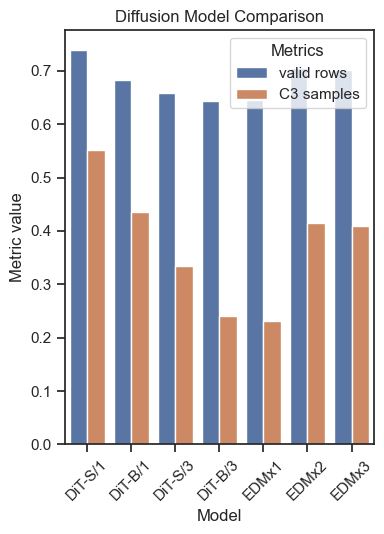

In [55]:
# Setting the style and palette for the plots
# nogrid
# sns.set_style("ticks")
# sns.set_palette('Set2
# Creating the plot data frame
plot_data = df[['model', 'valid', 'C3', ]]#'''r2_ratio'
# remove the row with "EDMx2*" model
plot_data = plot_data[plot_data['model'] != 'EDMx2*']
# rename column names valid -> valid row, C3 -> C3 sample
plot_data.columns = ['model', 'valid rows', 'C3 samples']
# Melting the data to long format suitable for sns.barplot
plot_data_melted = plot_data.melt(id_vars=['model'], var_name='Metric', value_name='Value')
# Creating the bar plot
plt.figure(figsize=(4, 5.5))
bar_plot = sns.barplot(x='model', y='Value', hue='Metric', data=plot_data_melted)
plt.title('Diffusion Model Comparison')
plt.xlabel('Model')
plt.ylabel('Metric value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
# Show the plot
plt.tight_layout()
saveallforms(dfdir, 'model_comparison_barplot')
plt.show()

ValueError: Could not interpret value `valid_ratio` for `y`. An entry with this name does not appear in `data`.

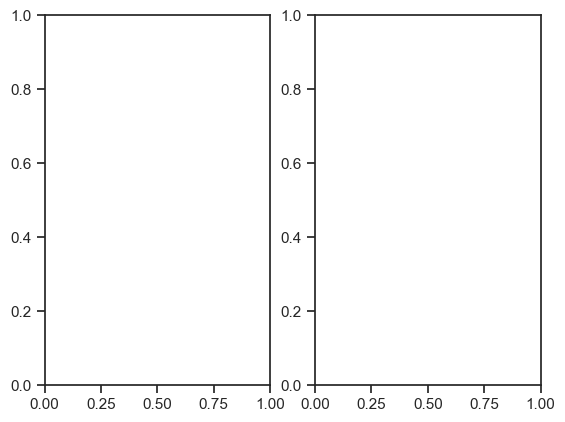

In [43]:
# Create a figure and a set of subplots
fig, ax =plt.subplots(1,2)

# Plot the first bar plot
sns.barplot(x='model', y='valid_ratio', data=df, ax=ax[0])
# Plot the second bar plot
sns.barplot(x='model', y='r3_ratio', data=df, ax=ax[1])
# Rotate the x-axis labels on the first plot
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
# Display the plots
plt.show()